In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
from sklearn.model_selection import train_test_split

## 1. Dataset

In [53]:
url = 'https://raw.githubusercontent.com/AndrsGzRo/mx-traffic-accidents-eda-ml/refs/heads/main/data-2025-11-24.csv'
df_raw = pd.read_csv(url)
df_raw.head(10)

,entidad_federativa,mes,accidentes,danios_materiales_millones,heridos,muertos
0,Aguascalientes,enero,17,0.7380,21,3
1,Aguascalientes,febrero,15,0.7130,16,2
2,Aguascalientes,marzo,14,0.3743,10,1
3,Aguascalientes,abril,13,0.4145,7,1
4,Aguascalientes,mayo,13,0.5470,15,0
5,Aguascalientes,junio,15,0.7800,8,0
6,Aguascalientes,julio,8,0.7340,7,3
7,Aguascalientes,agosto,17,1.1820,24,14
8,Aguascalientes,septiembre,14,0.5215,15,4
9,Aguascalientes,octubre,11,1.1930,12,4


### 1.1 Preprocesamiento

#### 1.1.1 Ordinal Encoding: Mes

In [54]:
df = df_raw.copy()
df['mes'] = df['mes'].str.title().str.strip()
# Ordinal Encoding
df['mes_num'] = df['mes'].map({
    'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,
    'Agosto':8,'Septiembre':9,'Octubre':10,'Noviembre':11,'Diciembre':12
})

#### 1.1.2 Get Dummies: Entidad Federativa

In [55]:
df = pd.get_dummies(df,columns=['entidad_federativa'],drop_first=True,dtype=int)
df.head()

,mes,accidentes,danios_materiales_millones,heridos,muertos,mes_num,entidad_federativa_Baja California,entidad_federativa_Baja California Sur,entidad_federativa_Campeche,entidad_federativa_Chiapas,...,entidad_federativa_Quintana Roo,entidad_federativa_San Luis Potosi,entidad_federativa_Sinaloa,entidad_federativa_Sonora,entidad_federativa_Tabasco,entidad_federativa_Tamaulipas,entidad_federativa_Tlaxcala,entidad_federativa_Veracruz,entidad_federativa_Yucatan,entidad_federativa_Zacatecas
0,Enero,17,0.7380,21,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Febrero,15,0.7130,16,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Marzo,14,0.3743,10,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abril,13,0.4145,7,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mayo,13,0.5470,15,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.2 Visualizaciones previas

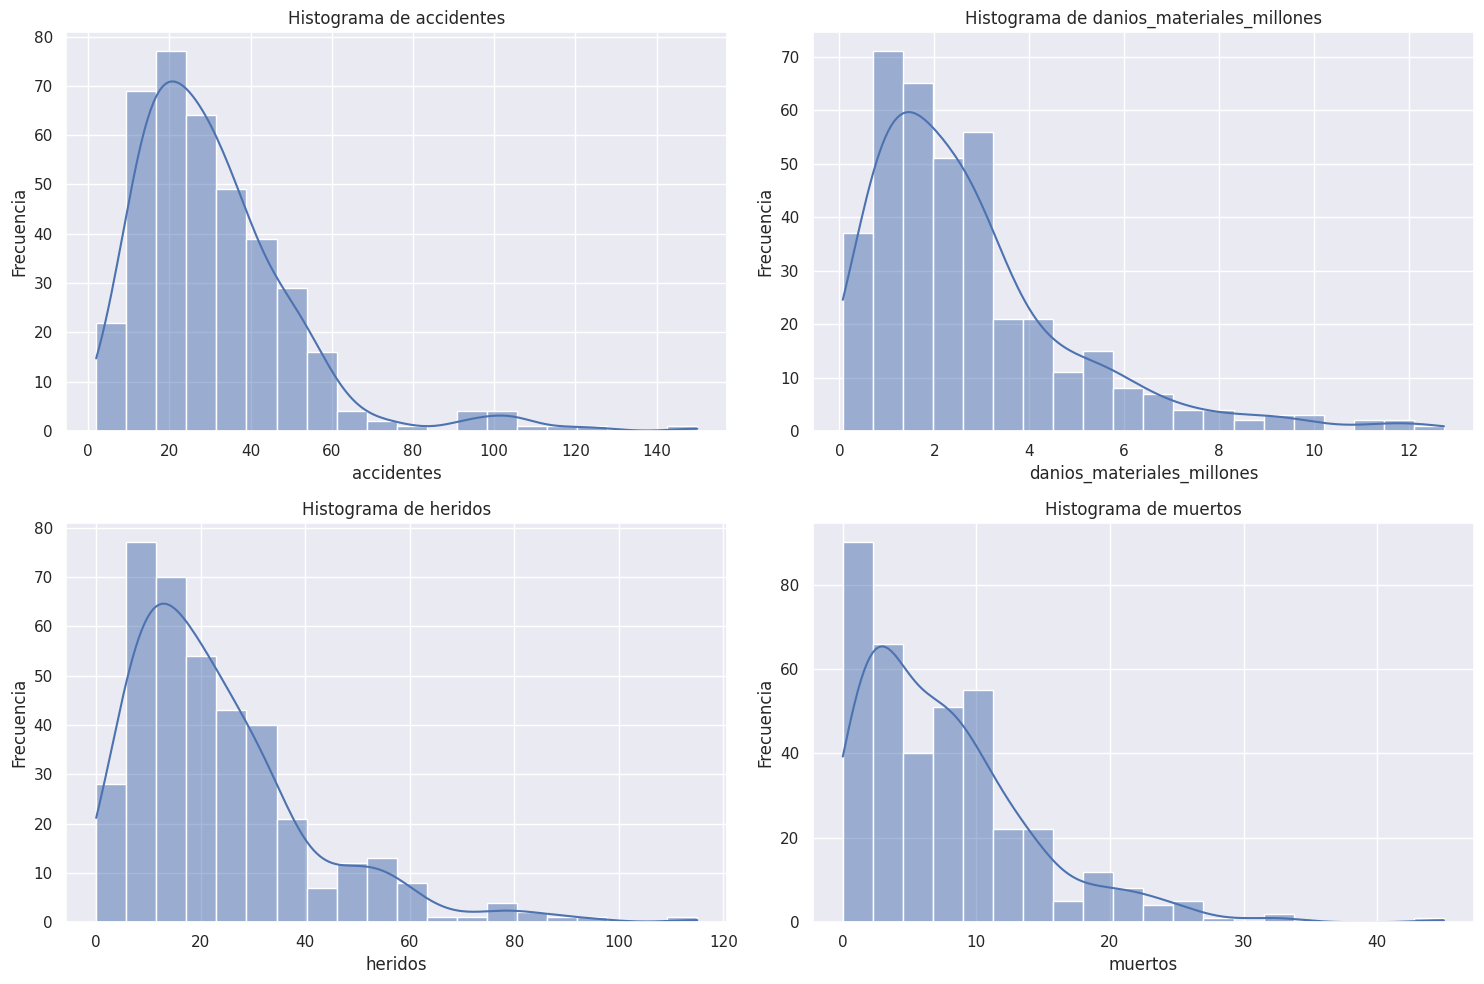

In [56]:
variables = ['accidentes','danios_materiales_millones','heridos','muertos']
plt.figure(figsize=(15,10))
for i,var in enumerate(variables,1):
    plt.subplot(2,2,i)
    sns.histplot(df[var],kde=True,bins=20)
    plt.title(f'Histograma de {var}',fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### 1.3 Transformaciones

In [57]:
df['accidentes_log'] = np.log1p(df['accidentes'])
df['heridos_log'] = np.log1p(df['heridos'])
df['muertos_log'] = np.log1p(df['muertos'])
df['danios_log'] = np.log1p(df['danios_materiales_millones'])

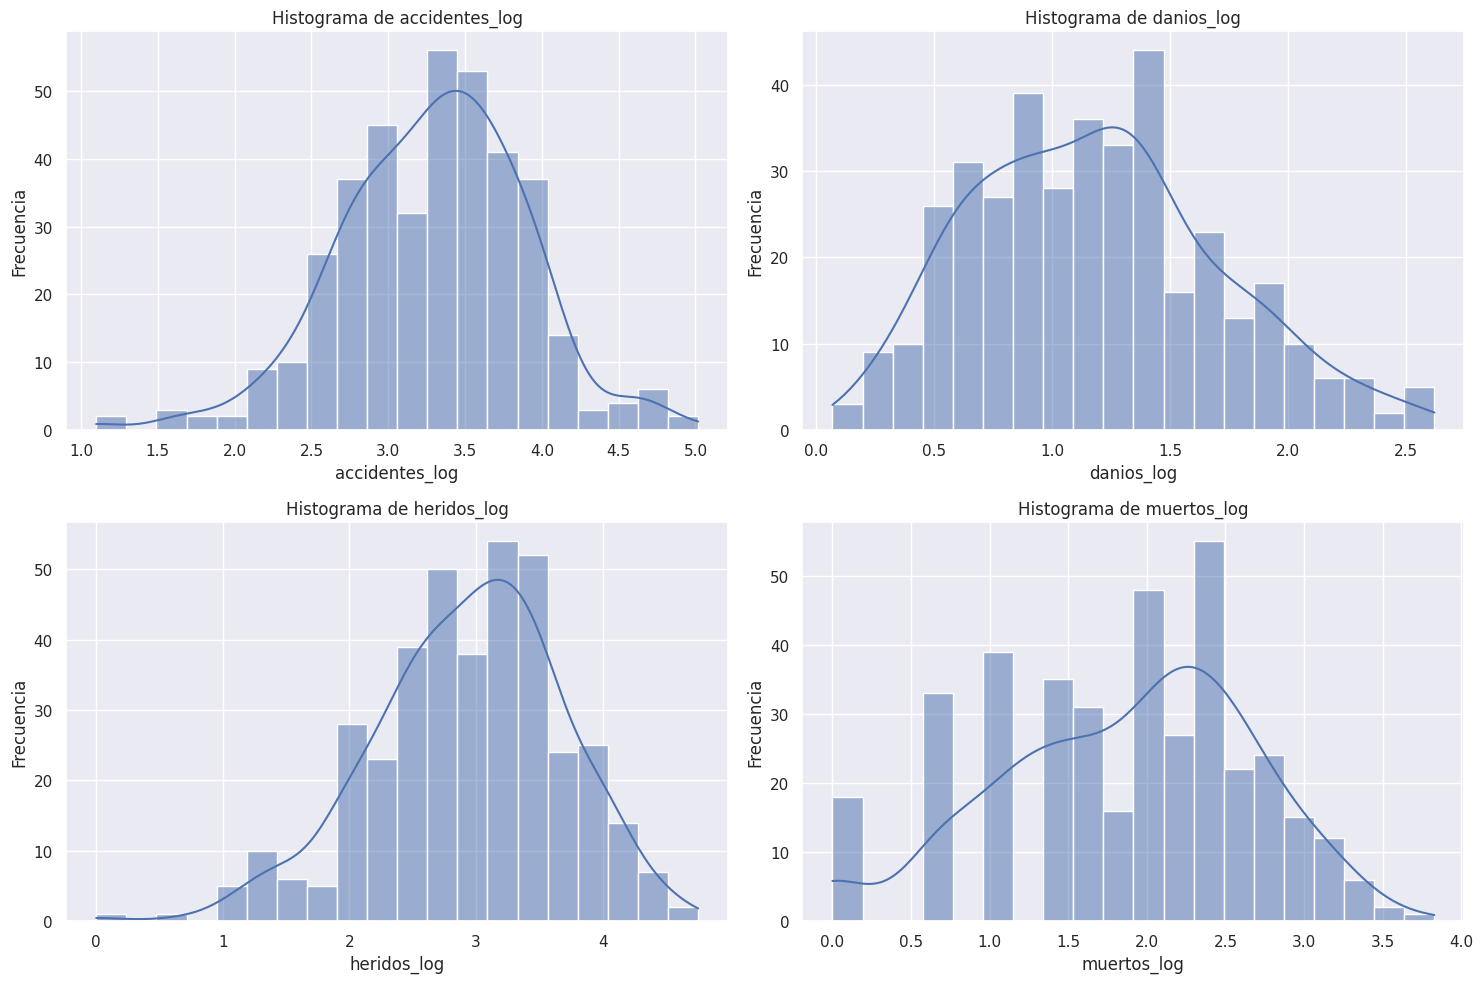

In [58]:
variables = ['accidentes_log','danios_log','heridos_log','muertos_log']
plt.figure(figsize=(15,10))
for i,var in enumerate(variables,1):
    plt.subplot(2,2,i)
    sns.histplot(df[var],kde=True,bins=20)
    plt.title(f'Histograma de {var}',fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## 2. Sets de Entrenamiento y Validación

In [59]:
features = ['accidentes_log','heridos_log','muertos_log','mes_num']
features += [col for col in df.columns if col.startswith('entidad_federativa_')]

# Variables predictores
X = df[features]
y = df['danios_log']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('X_train tamaño', X_train.shape)
print('y_train tamaño', y_train.shape)
print('X_test tamaño', X_test.shape)
print('y_test tamaño', y_test.shape)

X_train tamaño (307, 35)
y_train tamaño (307,)
X_test tamaño (77, 35)
y_test tamaño (77,)


## 3. LinearRegression

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
# Entrenando
model.fit(X_train,y_train)

# Prediccion
y_pred = model.predict(X_test)

# Métricas a escala real
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred)

# Evaluación
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mse_real = mean_squared_error(y_test_real,y_pred_real)
rmse = np.sqrt(mse)
rmse_real = np.sqrt(mse_real)

print(f'R2 (log): {r2:.4f}')
print(f'MSE (log): {mse:.4f}')
print(f'MSE Real: {mse_real:.4f}')
print(f'RMSE (log): {rmse:.4f}')
print(f'RMSE real: {rmse_real:.4f}')

R2 (log): 0.8274
MSE (log): 0.0546
MSE Real: 0.9610
RMSE (log): 0.2337
RMSE real: 0.9803


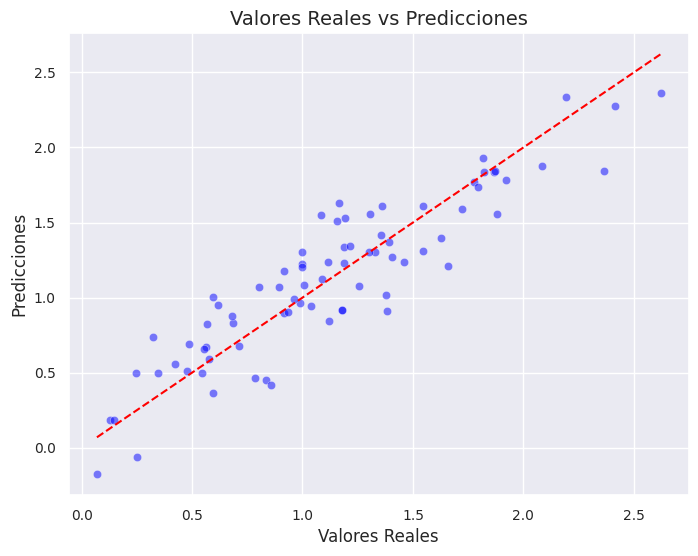

In [68]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=y_test,
    y=y_pred,
    color='blue',
    alpha=0.5
)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',
         linestyle='--')
plt.xlabel('Valores Reales')
plt.xticks(fontsize=10)
plt.ylabel('Predicciones')
plt.yticks(fontsize=10)
plt.title('Valores Reales vs Predicciones',fontsize=14)
plt.show()

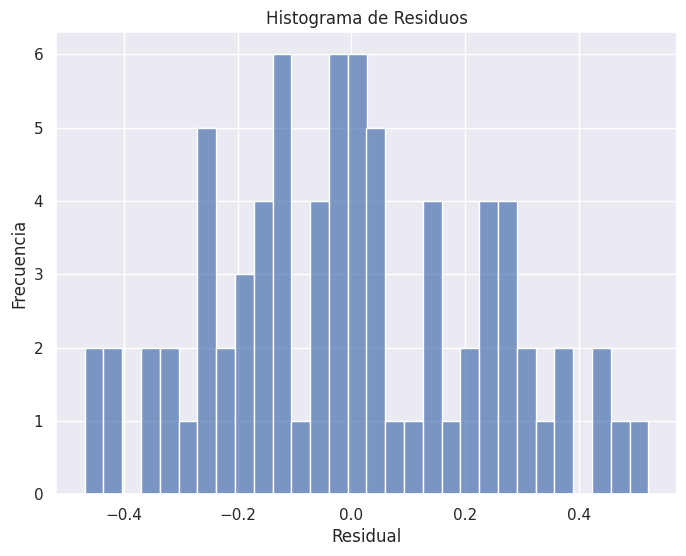

In [94]:
residuals = y_test-y_pred
plt.figure(figsize=(8,6))
sns.histplot(
    residuals,
    bins=30,
    alpha=0.7
)
plt.xlabel('Residual')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

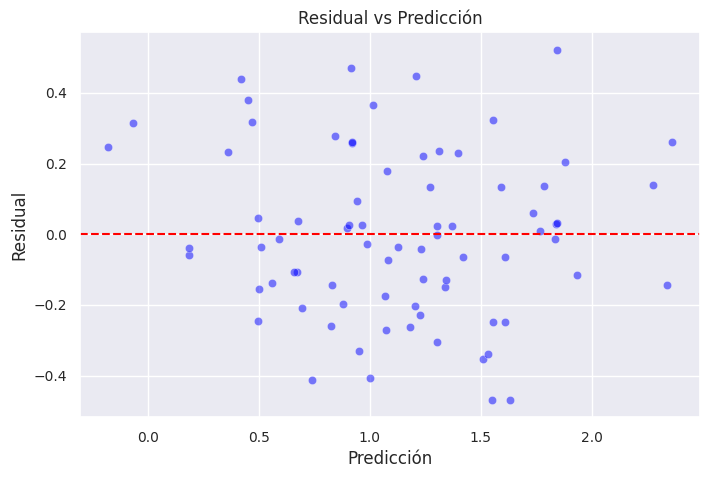

In [99]:
plt.figure(figsize=(8,5))
plt.axhline(0,color='red',linestyle='--')
sns.scatterplot(
    x=y_pred,y=residuals,color='blue',alpha=0.5)
plt.xlabel('Predicción')
plt.xticks(fontsize=10)
plt.ylabel('Residual')
plt.yticks(fontsize=10)
plt.title('Residual vs Predicción')
plt.show()

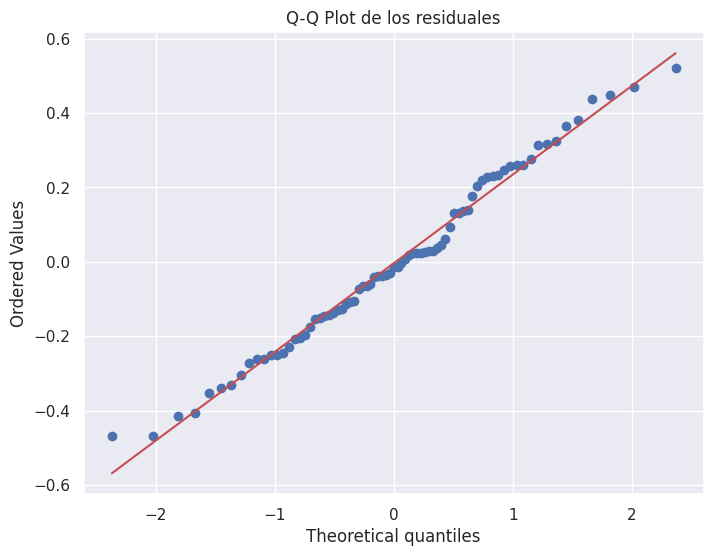

In [102]:
import scipy.stats as stats
plt.figure(figsize=(8,6))
stats.probplot(residuals,dist='norm',plot=plt)
plt.title('Q-Q Plot de los residuales')
plt.show()

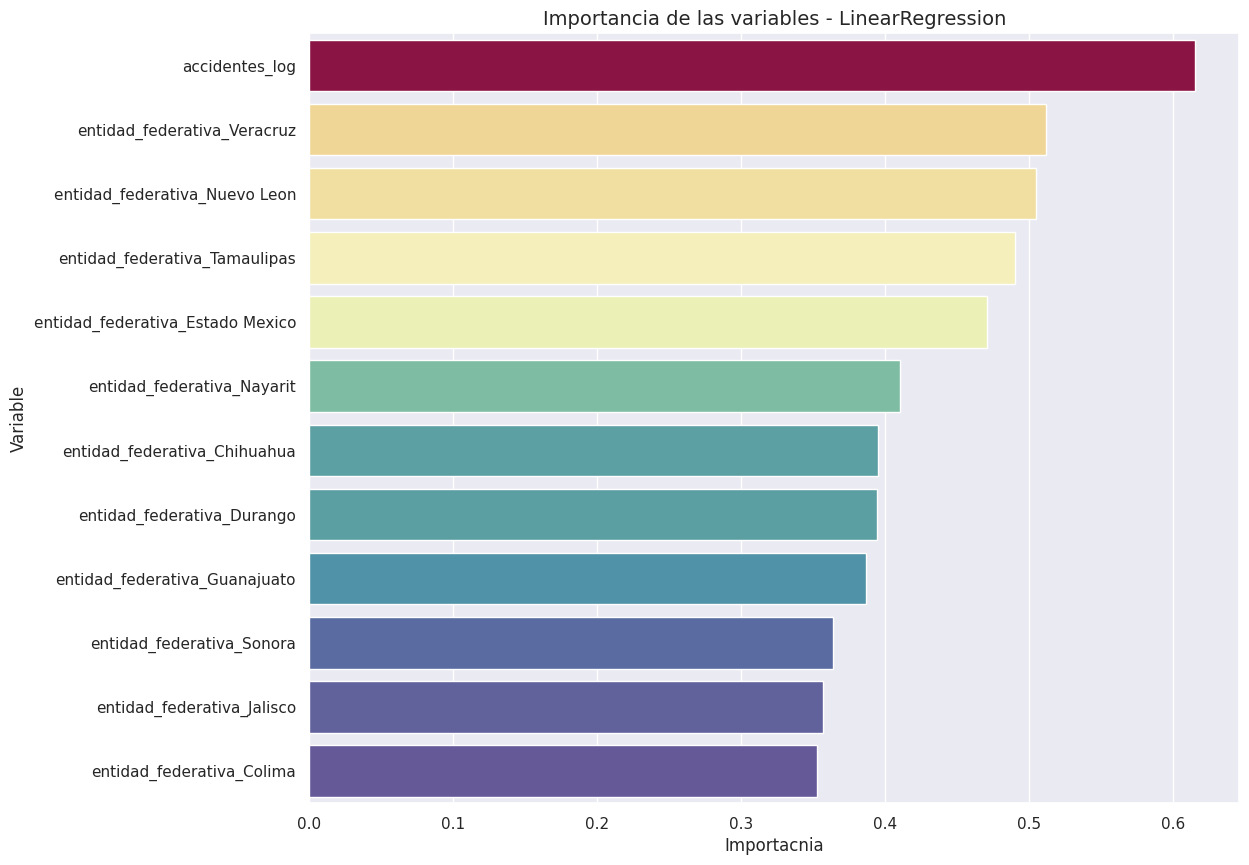

In [136]:
coef_df = pd.DataFrame({
    'feature':X_train.columns,
    'coef':model.coef_,
    'coef_abs':np.abs(model.coef_)
}).sort_values('coef',ascending=False)
plt.figure(figsize=(12,10))
sns.barplot(
    data=coef_df.head(12),
    x='coef_abs',
    y='feature',
    palette='Spectral_r',
    hue='coef',
    legend=False
)
plt.xlabel('Importacnia')
plt.ylabel('Variable')
plt.title('Importancia de las variables - LinearRegression',fontsize=14)
plt.show()